# 0. Configuration

In [1]:
# DxGy setup params
period_date_start = ['2021-12-17'] # YYYY-MM-DD
target_x = [66]
budget = [7000]
period = [7] # number of days the company will run
end_date = '2021-12-17'

# query and preprocessing params
file_dir = '/Users/skostuchik/projects/dxgy_mvp'
sql_drivers_context_path = '/sql/get_drivers_context.sql'
valid_driver_ids = '/data/drivers_to_reactivate_2_10_weeks.csv'
locality = 22534
driver_id_col = 'ID'
final_features_list = ['target_x', 'budget', 'period', 'trips',
                       'days_since_last_trip', 'days_since_first_trip']


# 1. Modules and functions

In [2]:
#%load_ext dotenv
#%dotenv
#%reload_ext dotenv

from utils.utils import read_file
from model.get_driver_scorings import *
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# 2. Main

In [3]:
# load drivers to target
driver_ids = read_file(file_dir + valid_driver_ids)
assert len(driver_ids) == driver_ids[driver_id_col].nunique(), 'There are duplicates in driver ids'
print(f'Number of unique driver ids {driver_ids[driver_id_col].nunique()}')


Number of unique driver ids 569


In [81]:
query = sql_from_file(file_dir + sql_drivers_context_path)\
                    .format(locality, end_date)

In [82]:
print(query)

select distinct d.ID 						AS driver_id
              , min(to_date(o.ORDER_DTTM)) 			as dt_first
              , max(to_date(o.ORDER_DTTM)) 			as dt_last
              , count(distinct ORDER_RK) 				as trips
from REPLICA.DRIVERS d
left join EMART."ORDER" o on d.ID = o.DRIVER_RK
where 1 = 1
and LOCALITY_RK = 22534
and to_date(o.ORDER_DTTM) < '2021-12-17'
and STATUS_CD = 'CP'
group by 1


In [4]:
# get drivers' data
drivers_context = get_drivers_context(file_dir, sql_drivers_context_path,
                                      locality, end_date = end_date,
                                      driver_ids = driver_ids, driver_id_col = driver_id_col)

In [5]:
# load models
models = load_dxgy_models(file_dir)

/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:325: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 1.1.dev0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:325: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 1.1.dev0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:325: UserWarning: Trying to unpickle estimator IsotonicRegression from version 0.24.1 wh

In [10]:
# get estimatios
setups_estimation = get_dxgy_estimations(drivers_context, models, file_dir, target_x, budget,
                                         period, period_date_start, final_features_list)

/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/skostuchik/opt/anaconda3/lib/pyth

In [11]:
setups_estimation

,target_x,budget,period,period_date_start,spends,trips
0,66,7000,7,2021-12-17,88058.131,1633.482


In [23]:
setups = {'target_x': target_x,
              'budget': budget,
              'period': period,
              'period_date_start': period_date_start,
              'spends': [],
              'trips': []}

In [24]:
setups

{'target_x': [66],
 'budget': [7000],
 'period': [7],
 'period_date_start': ['2021-12-17'],
 'spends': [],
 'trips': []}

In [25]:
for target_x, budget, period, period_date_start in zip(setups['target_x'], setups['budget'],
                                                       setups['period'], setups['period_date_start']):
    print(target_x, budget, period, period_date_start)

66 7000 7 2021-12-17


In [26]:
main_df = prepare_valid_df(drivers_context, target_x, budget, period, period_date_start)

In [38]:
main_df['calibrated_spend_preds'] = models['spends_model'].predict_proba(main_df[final_features_list])[:, -1]

/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [39]:
main_df

,driver_id,trips,days_since_last_trip,days_since_first_trip,target_x,budget,period,calibrated_spend_preds
26,14871438,777,53,643,66,7000,7,0.000
36,30518711,388,1,100,66,7000,7,0.000
52,31859579,160,52,59,66,7000,7,0.000
76,26951691,201,54,176,66,7000,7,0.000
81,29752783,10,100,132,66,7000,7,0.000
...,...,...,...,...,...,...,...,...
15982,14036266,227,99,648,66,7000,7,0.000
15986,24543031,96,17,213,66,7000,7,0.000
16002,19702567,274,86,389,66,7000,7,0.000
16011,31292979,5,79,79,66,7000,7,0.000


In [40]:
spends_model_preds = main_df['calibrated_spend_preds'].mean() * budget * main_df.driver_id.nunique() * .84

In [42]:
setups['spends'].append(spends_model_preds)

In [43]:
setups

{'target_x': [66],
 'budget': [7000],
 'period': [7],
 'period_date_start': ['2021-12-17'],
 'spends': [88058.13078801137],
 'trips': []}

In [44]:
#file_dir = '/Users/skhalilbekov/Desktop/wokrflow/dxgy_mvp'
sql_query_path = '/sql/get_dxgy_data.sql'
spends_query_path = 'sql/get_spend_shares.sql'
locality = 22534

target_cols = ['EXPECTED_RIDES']
drop_cols_for_train = ['ID', 'SPLIT_NO', 'PERIOD_DATE_START']
unique_obs_groupper = ['ID', 'SPLIT_NO', 'PERIOD_DATE_START', 'SEGMENT_TYPE']


params_grid = {
    'max_depth': [2, 3, 4],
    'n_estimators': [50, 100, 500],
    'max_features': [3, 4, 5]
    }

In [66]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import OneHotEncoder

In [46]:
pd.set_option('display.width', 800)
pd.set_option('display.max_columns', 10)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [47]:
def get_dxgy_data(file_dir: str, sql_query_path: str, locality: int):
    
    query = sql_from_file(file_dir + sql_query_path).format(locality)
    cred = pd.read_json(r'/Users/skostuchik/crd_exa.json')
    user = cred.iloc[0, 0]
    password = cred.iloc[0, 1]
    db_host = pyexasol.connect(dsn='ex1..3.city-srv.ru:8563', user=user, password=password, fetch_dict=True)

    df = db_host.export_to_pandas(query)
    
    return df

def is_weekend(day):
    if day <= 3:
        is_weekend = 0
    elif 3 < day < 7:
        is_weekend = 1
    else:
        is_weekend = -1
    return is_weekend

def calc_time_features(df: pd.DataFrame):
    
    df['month'] = df['PERIOD_DATE_START'].dt.month
    df['quarter'] = df['PERIOD_DATE_START'].dt.quarter
    df['dayofweek'] = df['PERIOD_DATE_START'].dt.dayofweek
    df['dayname'] = df['PERIOD_DATE_START'].dt.day_name()
    df['is_weekend'] = df['dayofweek'].apply(is_weekend)
    
    return df
    
def get_feature_importances(forest, X: pd.DataFrame):
    
    feature_names = [f"{i}" for i in X.columns]
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=feature_names)
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    plt.show()

# кодируем кат фичи
def code_dummy(data, feature):
    for i in data[feature].unique():
        data[feature + '=' + str(i)] = (data[feature] == i).astype(float)

In [48]:
# raw data
df = get_dxgy_data(file_dir, sql_query_path, locality)

# group by bonus id and split
main_df = df.groupby(unique_obs_groupper).agg({'DRIVER_ID': 'count',
                                               'BUDGET': 'sum',
                                               'PERIOD': 'mean',
                                               'FACT_RIDES': 'sum',
                                               'TARGET_Y': 'mean',
                                               'TARGET_X': 'mean'})\
                      .rename(columns = {'DRIVER_ID': 'total_drivers_count',
                                         'FACT_RIDES': 'EXPECTED_RIDES'})\
                      .reset_index()
filtered_main_df = main_df.loc[main_df['PERIOD_DATE_START'] < '2021-07-01 00:00:00']
filtered_main_df['TARGET_Y'] = filtered_main_df['BUDGET'] / filtered_main_df['total_drivers_count']

<ipython-input-48-4e9b86279d5d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_main_df['TARGET_Y'] = filtered_main_df['BUDGET'] / filtered_main_df['total_drivers_count']


In [53]:
y, X = filtered_main_df[target_cols], filtered_main_df.drop(target_cols + drop_cols_for_train, axis = 1)

In [56]:
forest = RandomForestRegressor(random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42,
                                                    train_size = .2)
rf_grid = GridSearchCV(estimator = forest, param_grid = params_grid, cv = 3)
rf_grid.fit(X_train, y_train)

/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:687: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:687: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:687: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selec

/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:687: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:687: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:687: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selec

/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:687: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:687: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:687: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selec

/Users/skostuchik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [2, 3, 4], 'max_features': [3, 4, 5],
                         'n_estimators': [50, 100, 500]})

In [89]:
rf_grid.cv_results_

{'mean_fit_time': array([0.05409273, 0.08162657, 0.39296444, 0.04591775, 0.08271575,
        0.41967257, 0.04010733, 0.09463628, 0.41612633, 0.04394937,
        0.07974148, 0.39329807, 0.04081837, 0.08033268, 0.43124898,
        0.04109637, 0.09111309, 0.40926862, 0.04420821, 0.08936803,
        0.46074629, 0.0420994 , 0.10541002, 0.39661598, 0.04694335,
        0.09097068, 0.42060375]),
 'std_fit_time': array([1.57167246e-02, 7.97989639e-03, 1.56230926e-02, 1.29426045e-03,
        1.06283575e-02, 1.61585597e-02, 1.26588714e-03, 3.03733271e-03,
        2.42651594e-03, 1.30319731e-03, 3.33301413e-03, 1.23270479e-02,
        4.99255311e-05, 4.04043661e-04, 4.00251456e-02, 1.01222414e-03,
        1.07034757e-02, 1.17087636e-02, 9.66286791e-04, 4.95877198e-03,
        2.06205738e-02, 3.62442736e-04, 1.64516326e-02, 1.56217842e-02,
        7.14752824e-04, 1.58407133e-04, 5.33271278e-03]),
 'mean_score_time': array([0.00547091, 0.00804313, 0.03257163, 0.00595665, 0.00825564,
        0.032047

In [58]:
# best params
rf_params = rf_grid.best_params_
print(f'Best cross val scoore: {rf_grid.best_score_}')

Best cross val scoore: 0.7652786238661302


In [59]:
rf = RandomForestRegressor(n_estimators = rf_params['n_estimators'], 
                           max_depth = rf_params['max_depth'] - 1,
                           max_features = rf_params['max_features'],
                           random_state = 42)

In [61]:
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9076223324230572
0.8764496068731993


<ipython-input-61-55c7f2d5310f>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [62]:
valid = pd.DataFrame({'SEGMENT_TYPE': [0],
                      'total_drivers_count': [534],
                      'BUDGET': [320400],
                      'PERIOD': [1],
                      'TARGET_Y': [600],
                      'TARGET_X': [6]})

In [63]:
valid

,SEGMENT_TYPE,total_drivers_count,BUDGET,PERIOD,TARGET_Y,TARGET_X
0,0,534,320400,1,600,6


In [64]:
print(f'Expected num of rides: {rf.predict(valid[X_test.columns])}\nExpected spend: {rf.predict(valid[X_test.columns]) / 6 * 600}')

Expected num of rides: [2614.92505582]
Expected spend: [261492.50558235]


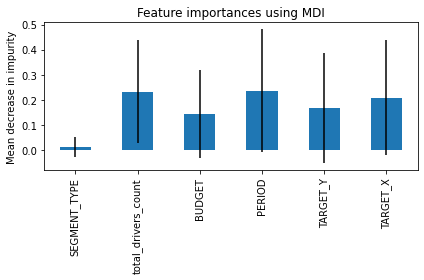

In [67]:
get_feature_importances(rf, X_train)

In [75]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

[Text(418.5, 475.65000000000003, 'total_drivers_count <= 298.0\nsquared_error = 15868346.782\nsamples = 243\nvalue = 1271.087'),
 Text(209.25, 339.75, 'BUDGET <= 20250.0\nsquared_error = 351883.839\nsamples = 197\nvalue = 367.041'),
 Text(104.625, 203.85000000000002, 'BUDGET <= 11000.0\nsquared_error = 21964.741\nsamples = 130\nvalue = 98.349'),
 Text(52.3125, 67.94999999999999, 'squared_error = 4873.108\nsamples = 112\nvalue = 52.739'),
 Text(156.9375, 67.94999999999999, 'squared_error = 34344.406\nsamples = 18\nvalue = 384.167'),
 Text(313.875, 203.85000000000002, 'TARGET_X <= 17.5\nsquared_error = 572926.761\nsamples = 67\nvalue = 941.304'),
 Text(261.5625, 67.94999999999999, 'squared_error = 77336.967\nsamples = 16\nvalue = 337.182'),
 Text(366.1875, 67.94999999999999, 'squared_error = 581248.621\nsamples = 51\nvalue = 1107.438'),
 Text(627.75, 339.75, 'TARGET_X <= 61.5\nsquared_error = 65984613.798\nsamples = 46\nvalue = 5403.871'),
 Text(523.125, 203.85000000000002, 'TARGET_Y <= 

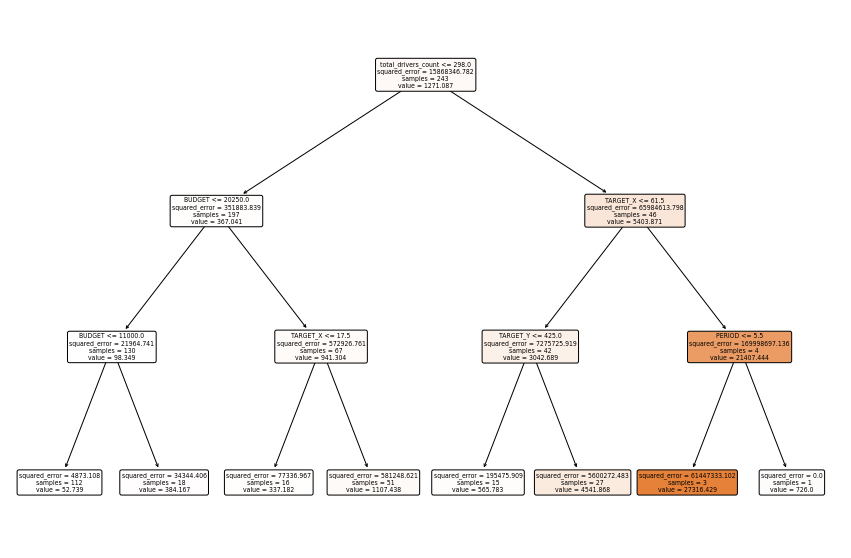

In [77]:
fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[0], 
          feature_names=X_train.columns,
          class_names=y.columns, 
          filled=True, impurity=True, 
          rounded=True)